### Data

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
y = [2,4,5,7,6,9] #dependent variable 
x1 = [3,5,7,9,11,15] #independent variable
x2 = [4,7,10,15,20,22] #independent variable
data = {"y":y,"x1":x1,"x2":x2}
df = pd.DataFrame(data)
df.index+=1
df.T

,1,2,3,4,5,6
y,2,4,5,7,6,9
x1,3,5,7,9,11,15
x2,4,7,10,15,20,22


### Solution with matrix method

In [55]:
n = len(y)
x = np.matrix([np.ones(n),x1,x2]).T
xx = np.dot(x.T,x)
xinv = np.linalg.inv(xx) #(x'x)-1
xy = np.dot(x.T,np.matrix(y).T)  #x'y
beta = xinv*xy

b0 = np.round(beta[0].item(0),4)
b1 = np.round(beta[1].item(0),4)
b2 = np.round(beta[2].item(0),4)

print(f"x\n{x}\n\nx'\n{x.T}\n\nx'x\n{xx}\n\ny\n{y}\n\nx'y\n{xy}\n\n(x'x)^-1\n{xinv}\n\n((x'x)^-1)*(x'y)\n{beta}",
f"\n\nY predicted model = {b0} + {b1} * x1 + {b2} * x2 ")

predicts = []
for i in range(n):
    predicts.append(b0+b1*x1[i]+b2*x2[i])
predicts = np.round(predicts,4)
print("\nPredicted values = ",predicts)

# R Squared
sres = 0
stot = 0
err = np.zeros(n)
for i in range(n):
    err[i]=y[i]-predicts[i]
    sres += (predicts[i]-np.mean(y))**2
    stot+=(np.square(y[i]-np.mean(y)))
rs = []
r_squared = ((sres/stot))
print("\nr_squared = ",r_squared)

x
[[ 1.  3.  4.]
 [ 1.  5.  7.]
 [ 1.  7. 10.]
 [ 1.  9. 15.]
 [ 1. 11. 20.]
 [ 1. 15. 22.]]

x'
[[ 1.  1.  1.  1.  1.  1.]
 [ 3.  5.  7.  9. 11. 15.]
 [ 4.  7. 10. 15. 20. 22.]]

x'x
[[   6.   50.   78.]
 [  50.  510.  802.]
 [  78.  802. 1274.]]

y
[2, 4, 5, 7, 6, 9]

x'y
[[ 33.]
 [325.]
 [509.]]

(x'x)^-1
[[ 0.93692661 -0.16399083  0.04587156]
 [-0.16399083  0.22362385 -0.13073394]
 [ 0.04587156 -0.13073394  0.08027523]]

((x'x)^-1)*(x'y)
[[ 0.97018349]
 [ 0.72247706]
 [-0.1146789 ]] 

Y predicted model = 0.9702 + 0.7225 * x1 + -0.1147 * x2 

Predicted values =  [2.6789 3.7798 4.8807 5.7522 6.6237 9.2843]

r_squared =  0.9135070766101695


### Use Sklearn library

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
y = [2,4,5,7,6,9]
x1 = [3,5,7,9,11,15]
x2 = [4,7,10,15,20,22]
data = pd.DataFrame({"y":y,"x1":x1,"x2":x2})

X = data.drop("y",axis=1)
y = data[["y"]]

model = LinearRegression().fit(X,y)
b0 = np.round(model.intercept_.item(0),4)
b1 = np.round(model.coef_[0][0].item(0),4)
b2 = np.round(model.coef_[0][1].item(0),4)
predicts = model.predict(X)
err = mean_squared_error(y,predicts)
print(f"Predicted model = {b0} + {b1} * x1  + {b2} * x2 \n\nPredicted Values\n{model.predict(X)}",
      f"\n\nMean Squared Error = {err}\n\nRsquare = {model.score(X,y)}")

Predicted model = 0.9702 + 0.7225 * x1  + -0.1147 * x2 

Predicted Values
[[2.67889908]
 [3.77981651]
 [4.88073394]
 [5.75229358]
 [6.62385321]
 [9.28440367]] 

Mean Squared Error = 0.4250764525993884

Rsquare = 0.9135437723526667


### Scatter Plot

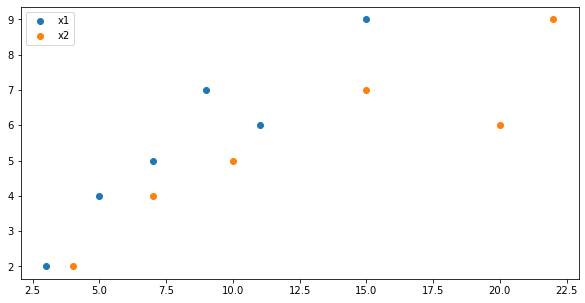

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(x1,y,label="x1")
plt.scatter(x2,y,label="x2")
plt.legend()

### The relationships between the Y and Predicted Y values

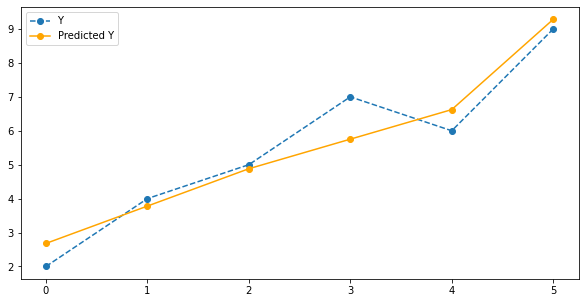

In [58]:
plt.figure(figsize=(10,5))
plt.plot(y,"o--",label="Y")
plt.plot(predicts ,"o-",label = "Predicted Y",color="orange")
plt.legend()

### Use Ordinary Least Squares 

In [59]:
from statsmodels.api import OLS

olsmodel = OLS(y,X).fit()
olsmodel.summary()

#Prob(F-statistic)=p-value < 0.005 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              116.7
Date:                Sun, 02 Jan 2022   Prob (F-statistic):                    0.000284
Time:                        13:21:04   Log-Likelihood:                         -6.9435
No. Observations:                   6   AIC:                                      17.89
Df Residuals:                       4   BIC:                                      17.47
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8923      0.416      2.144      0.099      -0.263       2.048
x2            -0.1622      0.263     -0.616      0.571      -0.893       0.569
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.572
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.358
Skew:                           0.239   Prob(JB):                        0.836
Kurtosis:                       1.903   Cond. No.                         22.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""